In [30]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("Titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
input=df.drop(['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
input

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


In [33]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
le_age=LabelEncoder()
le_Fare=LabelEncoder()
le_Pclass=LabelEncoder()

In [34]:
input['Sex_n']=le_sex.fit_transform(input['Sex'])
input['age_n']=le_age.fit_transform(input['Age'])
input['Fare_n']=le_Fare.fit_transform(input['Fare'])
input['Pclass_n']=le_Pclass.fit_transform(input['Pclass'])

In [35]:
input

,Pclass,Sex,Age,Fare,Sex_n,age_n,Fare_n,Pclass_n
0,3,male,34.5,7.8292,1,44,24,2
1,3,female,47.0,7.0000,0,60,5,2
2,2,male,62.0,9.6875,1,74,41,1
3,3,male,27.0,8.6625,1,34,34,2
4,3,female,22.0,12.2875,0,27,46,2
...,...,...,...,...,...,...,...,...
413,3,male,NaN,8.0500,1,79,31,2
414,1,female,39.0,108.9000,0,51,154,0
415,3,male,38.5,7.2500,1,50,9,2
416,3,male,NaN,8.0500,1,79,31,2


In [36]:
input=input.drop(['Sex','Age','Pclass','Fare'],axis='columns')
input

,Sex_n,age_n,Fare_n,Pclass_n
0,1,44,24,2
1,0,60,5,2
2,1,74,41,1
3,1,34,34,2
4,0,27,46,2
...,...,...,...,...
413,1,79,31,2
414,0,51,154,0
415,1,50,9,2
416,1,79,31,2


In [37]:
target=df.Survived
target

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
xtest,xtrain,ytest,ytrain=train_test_split(input,target,train_size=0.3)

In [39]:
xtrain

,Sex_n,age_n,Fare_n,Pclass_n
146,1,79,126,0
341,1,40,13,2
118,1,46,143,0
241,0,58,103,1
203,0,11,93,1
...,...,...,...,...
278,1,38,80,1
119,0,37,93,1
231,0,26,94,0
208,0,42,96,0


In [40]:
ytest

44     1
156    1
103    0
221    0
350    1
      ..
168    1
42     0
268    1
152    0
144    0
Name: Survived, Length: 125, dtype: int64

In [41]:
model=tree.DecisionTreeClassifier()
model.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [42]:
model.score(xtest,ytest)

1.0

<Axes: >

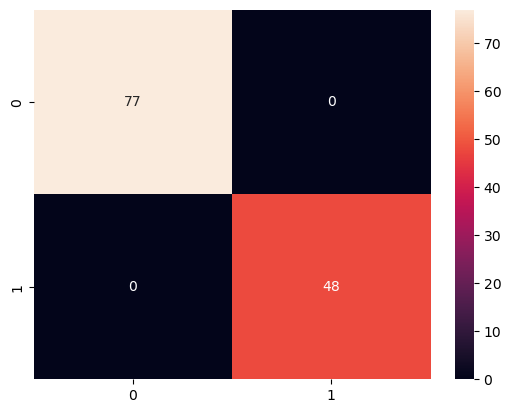

In [44]:
y_predicted=model.predict(xtest)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predicted)
import seaborn as sn
sn.heatmap(cm,annot=True)